In [1]:
from ipynb.fs.full.Functions import * 


In [97]:

m2m4 = np.arange(0.01,360,45)
m2m4radians = (m2m4/57.29) # 2*m2-m4

In [118]:
Qs = np.ndarray(shape=(m2m4radians.size, 26,448))

for i,M in enumerate(m2m4radians):
    Qs[i] = get_Q_arr(Kv=1e-2, Ws=1e-3, phaseM2 =M/2, phaseM4=0)[3] #This is sediment transport Q
    



In [124]:
T =(12*60+25)*60  
deltaT = 300 
Nsteps = T/deltaT       # Nr of timesteps in one tidal cycle.


# calculate tidally averaged sediment transport (only averaging over last tidal cycle)
final_cycle = int(-Nsteps)

mQ = np.mean(Qs[5][:,final_cycle:], 1)


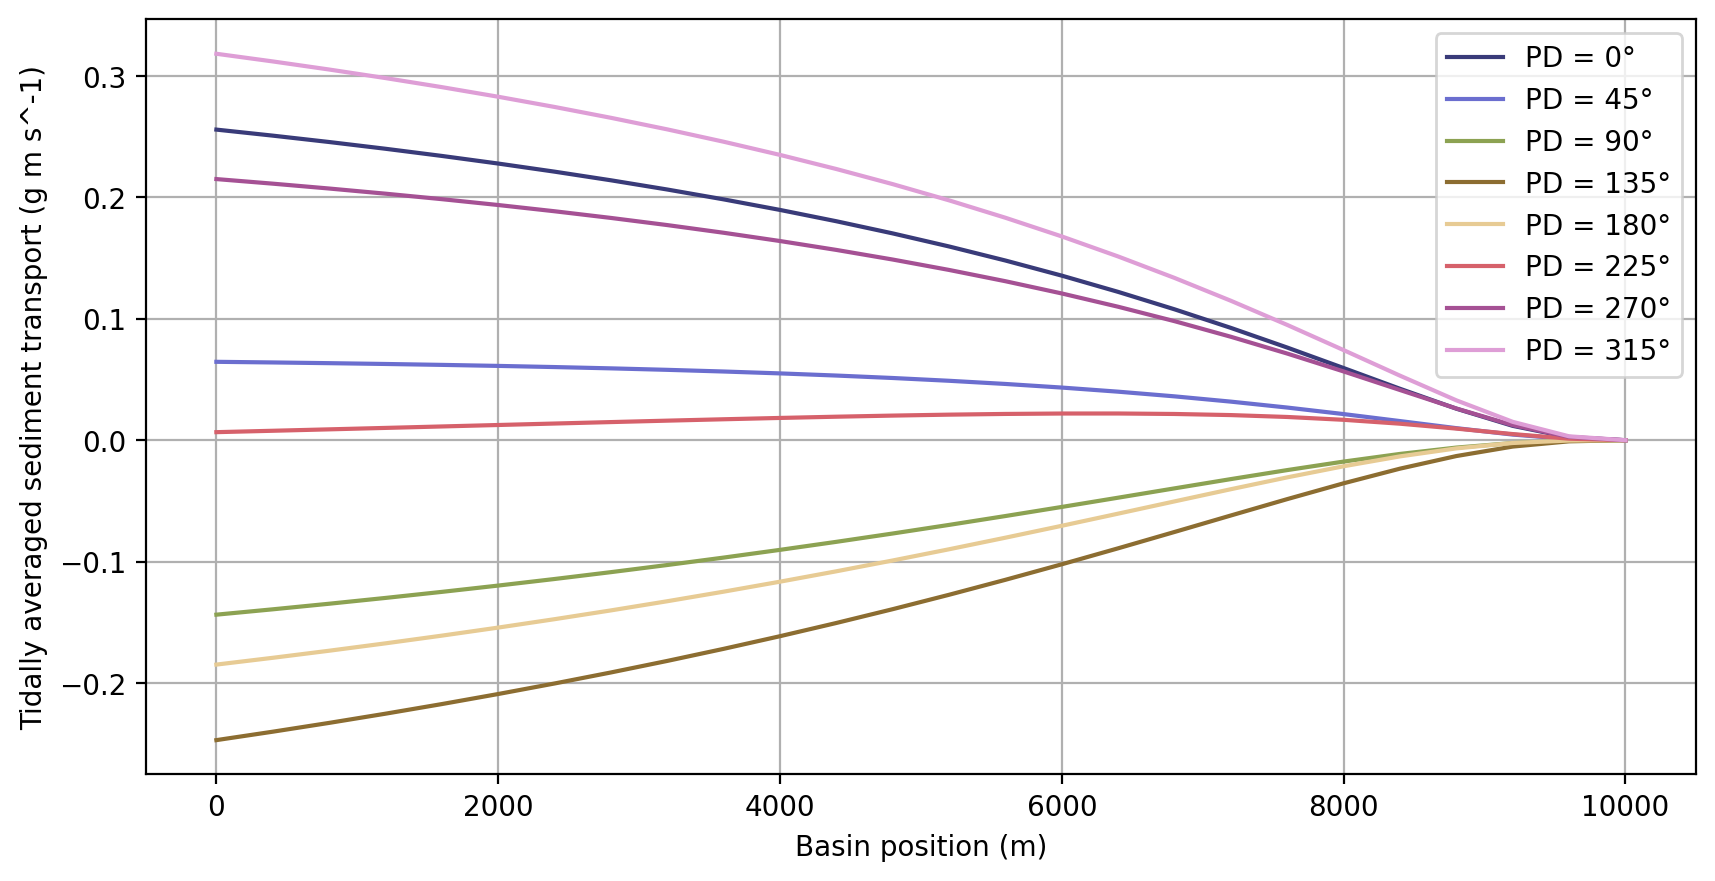

In [123]:
cmap = matplotlib.cm.get_cmap('tab20b')
rgba = cmap(0.5)
N = len(Con) - 1


for idx,difQ in enumerate(Qs):
    colorfloat = idx/N
    rgb = cmap(colorfloat)
    avgQ = np.mean(difQ[:,final_cycle:], 1)
#     print(avgQ.shape)
#     print(avgQ)
    plt.plot(np.arange(0,10400,400),1e3*avgQ,label=f'PD = {int(np.round(m2m4[idx],0))}°',c=rgb)  # I think they want this. This is the average Q over the basin length
#     plt.plot(difQ[0])#,label=f'phase difference = {np.round(m2m4[idx],0)}')
    
plt.xlabel('Basin position (m)')   
plt.ylabel('Tidally averaged sediment transport (g m s^-1)')
plt.grid()
plt.legend()